In [1]:
#EC9630 Machine Learning - Laboratory 1
#Task: STASTICAL PATTEN CLASSIFICATION – DECISION TREE AND INFORMATION GAIN
#Name: AGRAPALA P.W.S.H.D.
#Reg NO: 2021/E/121
#Date: 31st JANUARY 2025
#Time: 3.00 PM

#REFERENCES: 
#Kaggle Learn - https://www.kaggle.com/learn
#Cross validation - https://www.kaggle.com/code/alexisbcook/cross-validation 
#Creating Features - https://www.kaggle.com/code/ryanholbrook/creating-features 
#Plot the Tree - https://scikitlearn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-autoexamples-tree-plot-unveil-tree-structure-py

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv
/kaggle/input/dataset/diabetes_012_health_indicators_BRFSS2015.csv


In [3]:
#PART 01
# Step 1: Import necessary libraries

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# Step 2: Load the dataset

url = "/kaggle/input/dataset/diabetes_012_health_indicators_BRFSS2015.csv"

df = pd.read_csv(url)

# Step 3: Analyze the dataset

# a. Read all the information

print("Dataset Information:")

print(df.info())

# b. Explain the Variable type information

print("\nVariable Types:")

print(df.dtypes)

# c. Identify features and labels

features = df.drop('Diabetes_012', axis=1)

labels = df['Diabetes_012']

# d. Identify the feature value distribution

print("\nFeature Value Distribution:")

for column in features.columns:

    print("\nFeature:", column)

    print(features[column].value_counts())

# You can further analyze the dataset as needed

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 no

First few rows of the dataset:
   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0 

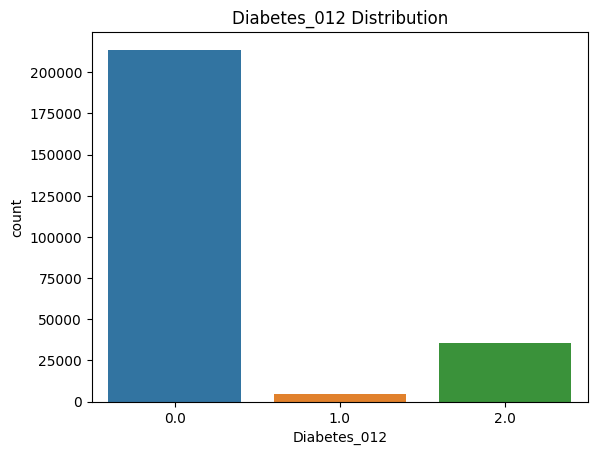


Missing Values:
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

First few rows after preprocessing:
   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           NaN     1.0       1.0        1.0  40.0     1.0     0.0   
1           NaN     0.0       0.0        0.0  25.0     1.0     0.0   
2           NaN     1.0       1.0        1.0  28.0     0.0     0.0   
3           NaN     1.0       0.0        1.0  27.0     0.0     0.0   
4          

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [4]:
#PART 03
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
url = "/kaggle/input/dataset/diabetes_012_health_indicators_BRFSS2015.csv"
df = pd.read_csv(url)

# Step 3: Exploratory Data Analysis (EDA)
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Display dataset information
print("\nDataset Information:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Diabetes_012 distribution
print("\nDiabetes_012 Distribution:")
print(df['Diabetes_012'].value_counts())

# Visualizing Diabetes_012 distribution
sns.countplot(x='Diabetes_012', data=df)
plt.title('Diabetes_012 Distribution')
plt.show()

# Missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Preprocessing
# Convert categorical variables to numerical variables
df['Diabetes_012'] = df['Diabetes_012'].map({'Positive': 1, 'Negative': 0})

# Display the first few rows after preprocessing
print("\nFirst few rows after preprocessing:")
print(df.head())

# Separate features and labels
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

# Encode categorical variables
X_encoded = pd.get_dummies(X)

# Display the first few rows of encoded features
print("\nFirst few rows of encoded features:")
print(X_encoded.head())

# You can further preprocess the data as needed


In [5]:
#PART 04
# Separate the dataframe into features and labels
X = df.drop('Diabetes_012', axis=1)  # Features
y = df['Diabetes_012']                # Labels

# Display the shape of features and labels
print("Shape of Features:", X.shape)
print("Shape of Labels:", y.shape)

Shape of Features: (253680, 21)
Shape of Labels: (253680,)


Information Gain for each feature:
GenHlth                 0.055608
HighBP                  0.054169
PhysActivity            0.051721
AnyHealthcare           0.047951
CholCheck               0.046891
HighChol                0.041923
Fruits                  0.040866
Veggies                 0.040530
BMI                     0.033070
Age                     0.025628
Sex                     0.024712
DiffWalk                0.023796
Smoker                  0.023794
Education               0.023558
Income                  0.022624
HeartDiseaseorAttack    0.014888
PhysHlth                0.014689
MentHlth                0.004772
Stroke                  0.004412
HvyAlcoholConsump       0.002824
NoDocbcCost             0.000386
dtype: float64


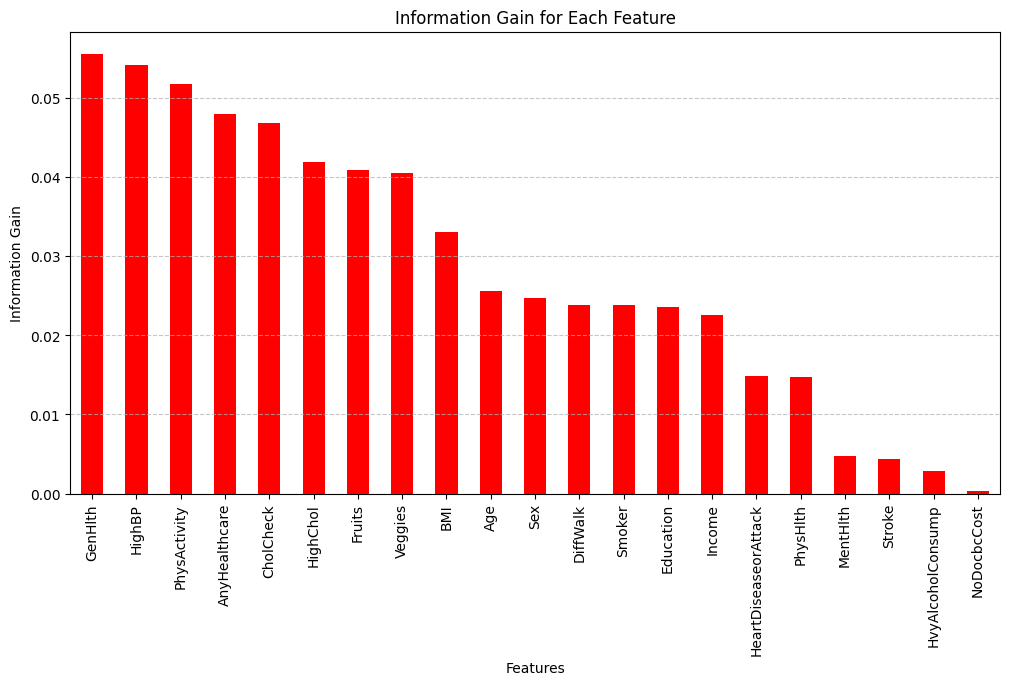

In [6]:
#PART 05
# Step 1: Import necessary libraries
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load the dataset
file_path = "/kaggle/input/dataset/diabetes_012_health_indicators_BRFSS2015.csv"
df = pd.read_csv(file_path)

# Step 3: Separate features and target variable
X = df.drop(columns=['Diabetes_012'])  # Exclude target variable
y = df['Diabetes_012']  # Target variable

# Step 4: Encode categorical variables (if any exist)
X_encoded = pd.get_dummies(X)  # Ensures all variables are numeric

# Step 5: Calculate information gain for each feature
information_gain = mutual_info_classif(X_encoded, y, random_state=42)
information_gain = pd.Series(information_gain, index=X_encoded.columns)

# Step 6: Sort the information gain values in descending order
information_gain = information_gain.sort_values(ascending=False)

# Step 7: Display information gain for each feature
print("Information Gain for each feature:")
print(information_gain)

# Step 8: Visualize the information gain values
plt.figure(figsize=(12,6))
information_gain.plot(kind='bar', color='red')
plt.title('Information Gain for Each Feature')
plt.xlabel('Features')
plt.ylabel('Information Gain')
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [7]:
#PART 06
# Step 1: Import necessary library
from sklearn.model_selection import train_test_split

# Step 2: Split data into training (70%) and temporary set (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y, test_size=0.3, random_state=42, stratify=y)

# Step 3: Split temporary set into validation (20%) and testing (10%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42, stratify=y_temp)

# Step 4: Display the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (177576, 21) (177576,)
Validation set shape: (50736, 21) (50736,)
Testing set shape: (25368, 21) (25368,)


Validation Accuracy: 0.8424195837275308

Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.00      0.00      0.00      7069

    accuracy                           0.84     50736
   macro avg       0.28      0.33      0.30     50736
weighted avg       0.71      0.84      0.77     50736


Confusion Matrix:
[[42741     0     0]
 [  926     0     0]
 [ 7069     0     0]]

Decision Tree Hyperparameters:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


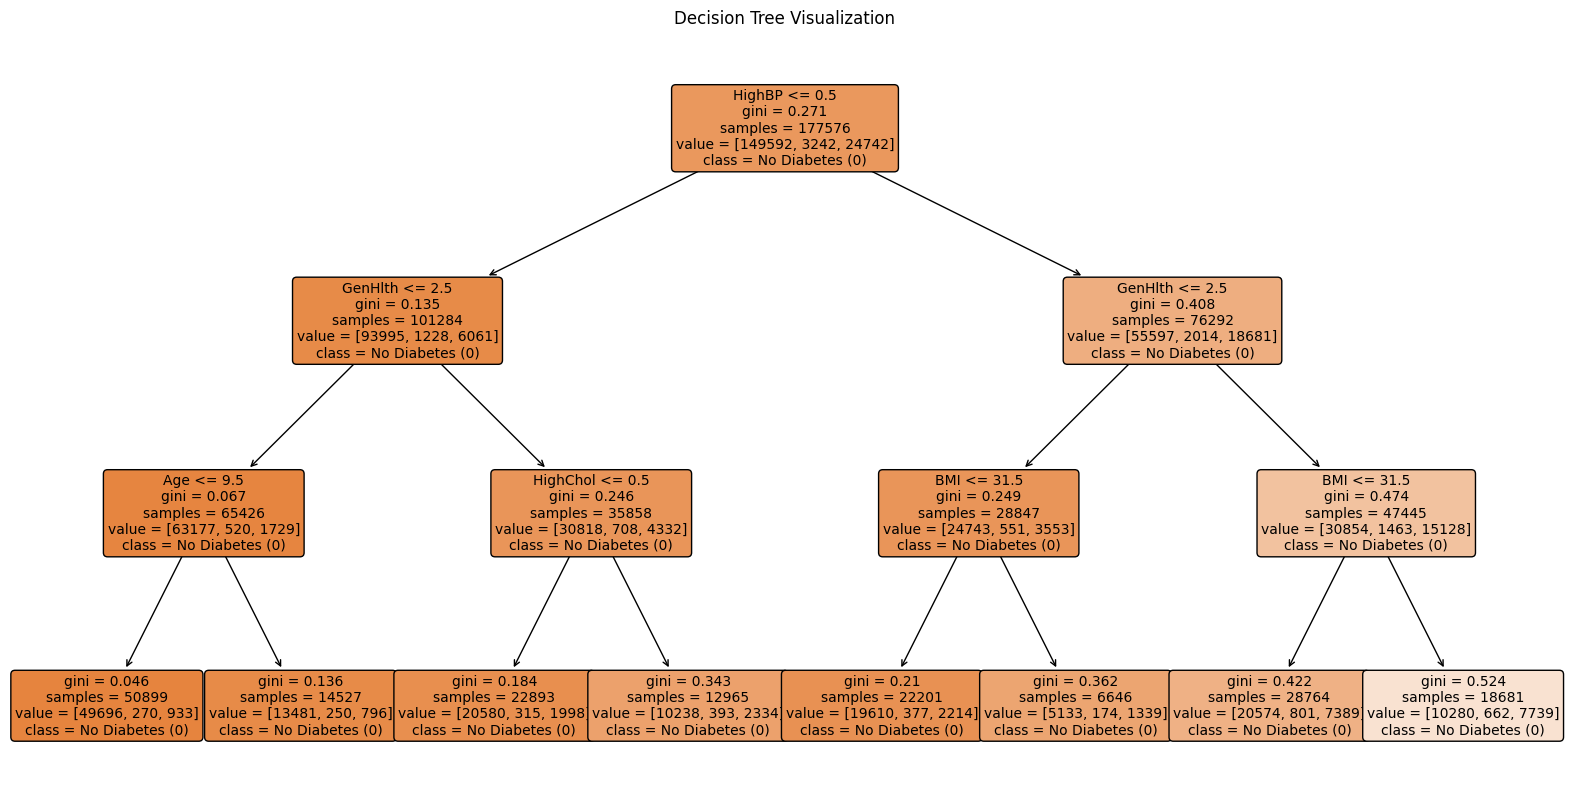


Cross-validation Scores: [0.84240906 0.84243277 0.84240462 0.84240462 0.84240462]
Mean Cross-validation Score: 0.8424111366518087


In [8]:
#PART 07
#Decision Tree classifier SCIKIT learn - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# Step 1: Import necessary libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Create a Decision Tree Classifier (Limiting Depth for Better Visualization)
clf = DecisionTreeClassifier(random_state=42, max_depth=3)  # Adjust max_depth as needed

# Step 3: Train the model on the training set
clf.fit(X_train, y_train)

# Step 4: Model Evaluation
# Predictions on the validation set
y_pred = clf.predict(X_val)

# Accuracy score on the validation set
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred))

# Step 5: Explain Hyperparameters
print("\nDecision Tree Hyperparameters:")
print(clf.get_params())

# Step 6: Plot the Decision Tree
plt.figure(figsize=(20, 10))  # Set figure size
plot_tree(
    clf, 
    filled=True, 
    feature_names=X_encoded.columns, 
    class_names=['No Diabetes (0)', 'Pre-Diabetes (1)', 'Diabetes (2)'], 
    rounded=True, 
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()

# Step 7: Model Evaluation using cross-validation
# Calculate cross-validation scores
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
print("\nCross-validation Scores:", cv_scores)
print("Mean Cross-validation Score:", np.mean(cv_scores))


In [9]:
#Part 08
#Plot the decision surface of decision trees trained on the iris dataset - https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py
# Step 1: Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Step 2: Create a Decision Tree Classifier with Optimized Parameters
clf = DecisionTreeClassifier(
    random_state=42, 
    criterion='entropy',    # Using entropy instead of gini for better splits
    max_depth=5,            # Limiting tree depth to reduce overfitting
    min_samples_split=10,   # Require at least 10 samples to split a node
    min_samples_leaf=5      # Each leaf node must have at least 5 samples
)

# Step 3: Train the model using the training set
clf.fit(X_train, y_train)

# Step 4: Model Evaluation
# Predictions on the validation set
y_pred = clf.predict(X_val)

# Accuracy score on the validation set
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred))

# Optional: Hyperparameter Tuning using Grid Search
param_grid = {
    'max_depth': [3, 5, 10], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 5, 10]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42, criterion='entropy'), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters from Grid Search
print("\nBest Parameters from Grid Search:", grid_search.best_params_)

# Train the optimized model
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

# Evaluate optimized model
y_pred_optimized = best_clf.predict(X_val)
optimized_accuracy = accuracy_score(y_val, y_pred_optimized)
print("\nOptimized Validation Accuracy:", optimized_accuracy)


Validation Accuracy: 0.8472485020498266

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.55      0.13      0.21      7069

    accuracy                           0.85     50736
   macro avg       0.47      0.37      0.38     50736
weighted avg       0.80      0.85      0.80     50736


Confusion Matrix:
[[42065     0   676]
 [  853     0    73]
 [ 6148     0   921]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Best Parameters from Grid Search: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

Optimized Validation Accuracy: 0.8472485020498266


In [10]:
#Part 09
# Step 1: Predict the labels for the validation set
y_pred_val = clf.predict(X_val)

# Step 2: Display the predicted labels
print("Predicted labels for the validation set:")
print(y_pred_val[:200])  # Displaying first 200 predictions for better readability

Predicted labels for the validation set:
[0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [11]:
#Part 10
#Evaluation Score - https://scikit-learn.org/stable/modules/model_evaluation.html
# Step 1: Import necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 2: Calculate evaluation scores
accuracy = accuracy_score(y_val, y_pred_val)
precision = precision_score(y_val, y_pred_val, average='weighted')
recall = recall_score(y_val, y_pred_val, average='weighted')
f1 = f1_score(y_val, y_pred_val, average='weighted')

# Step 3: Display the evaluation scores
print("Evaluation Scores:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Evaluation Scores:
Accuracy: 0.8472485020498266
Precision: 0.7990582082466628
Recall: 0.8472485020498266
F1 Score: 0.8013432331167668


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
#Part 11
#Cross validation - https://www.kaggle.com/code/alexisbcook/cross-validation
# Step 1: Import necessary libraries
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import make_scorer

# Step 2: Load the dataset
file_path = "/kaggle/input/dataset/diabetes_012_health_indicators_BRFSS2015.csv"
df = pd.read_csv(file_path)

# Step 3: Separate features and target variable
X = df.drop(columns=['Diabetes_012'])  # Features
y = df['Diabetes_012']  # Target variable

# Step 4: Encode categorical variables (if any exist)
X_encoded = pd.get_dummies(X)  # Ensures all variables are numeric

# Step 5: Split data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42, stratify=y)

# Step 6: Create an XGBoost Classifier with optimized hyperparameters
xgb_clf = XGBClassifier(
    random_state=42,
    n_estimators=200,  # Number of trees
    max_depth=6,       # Maximum depth of each tree
    learning_rate=0.1, # Learning rate
    subsample=0.8,     # Subsample ratio of the training instances
    colsample_bytree=0.8,  # Subsample ratio of columns when constructing each tree
    objective='multi:softmax',  # Multi-class classification
    num_class=3,  # Number of classes (0, 1, 2 for diabetes)
    eval_metric='mlogloss'  # Evaluation metric
)

# Step 7: Train the model on the training set
xgb_clf.fit(X_train, y_train)

# Step 8: Predict on the test set
y_pred = xgb_clf.predict(X_test)

# Step 9: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Evaluation Scores on Test Set:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Step 10: Cross-validation for robust evaluation
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1_score': make_scorer(f1_score, average='weighted')
}

cv_results = cross_validate(xgb_clf, X_encoded, y, cv=5, scoring=scoring)

print("\nEvaluation Scores using 5-Fold Cross Validation:")
print("Accuracy:", cv_results['test_accuracy'].mean())
print("Precision:", cv_results['test_precision'].mean())
print("Recall:", cv_results['test_recall'].mean())
print("F1 Score:", cv_results['test_f1_score'].mean())

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluation Scores on Test Set:
Accuracy: 0.8501130032586987
Precision: 0.8064550378237852
Recall: 0.8501130032586987
F1 Score: 0.8127348189278651


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Evaluation Scores using 5-Fold Cross Validation:
Accuracy: 0.8497792494481237
Precision: 0.8061802781679432
Recall: 0.8497792494481237
F1 Score: 0.8123195853332646


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
#Part 12
# Step 1: Import necessary libraries
from sklearn.model_selection import RandomizedSearchCV

# Step 2: Define the hyperparameter grid
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}

# Step 3: Create the randomized search object (faster than GridSearchCV)
random_search = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_dist,
    n_iter=15,  # Adjust for better exploration
    cv=10,  # Increased cross-validation folds
    scoring='accuracy',  # You can also try 'f1' for imbalanced data
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Step 4: Fit the search to the data
random_search.fit(X_encoded, y)
# Step 5: Get the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Fitting 10 folds for each of 15 candidates, totalling 150 fits
Best Parameters: {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 5, 'criterion': 'gini'}
Best Score: 0.8474810785241249


In [14]:
# @title
# Step 6: Train the model with the best parameters
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

# Step 7: Predict the labels for the validation set
y_pred_val_best = best_clf.predict(X_val)

# Step 8: Display the evaluation scores for the model with the best parameters
accuracy_best = best_clf.score(X_val, y_val)  # Cleaner way to get accuracy
precision_best = precision_score(y_val, y_pred_val_best, average='weighted', zero_division=1)
recall_best = recall_score(y_val, y_pred_val_best, average='weighted', zero_division=1)
f1_best = f1_score(y_val, y_pred_val_best, average='weighted')

print("\nEvaluation Scores with Best Parameters:")
print("Accuracy:", accuracy_best)
print("Precision:", precision_best)
print("Recall:", recall_best)
print("F1 Score:", f1_best)



Evaluation Scores with Best Parameters:
Accuracy: 0.8472485020498266
Precision: 0.8173095485178707
Recall: 0.8472485020498266
F1 Score: 0.8013432331167668
